In [1]:
!pip install ccxt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 11.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 10.6 MB/s eta 0:00:00a 0:00:01


In [ ]:
import ccxt
import openai
import json
import matplotlib.pyplot as plt
from openai import OpenAI
import numpy as np
from dotenv import load_dotenv
import os

load_dotenv()
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")


In [ ]:

# Инициализация клиента биржи (используем Binance как пример)
exchange = ccxt.binance()
symbol = "TRUMP/USDT"
timeframe = "1h"

# Получение исторических данных
ohlcv = exchange.fetch_ohlcv(symbol, timeframe)

# Извлечение цен закрытия
closing_prices = [candle[4] for candle in ohlcv]

pred_len = 96
# Разделение данных
input_sequence = closing_prices[:-pred_len]  
labels = closing_prices[-pred_len:]  # 96 значений для сравнения
n = len(input_sequence)
# Формируем промпт о TRUMP Coin
pred_len = 96
user_prompt = f"""TRUMP Coin is a memecoin associated with political branding and speculative trading, often experiencing high volatility. 
Given this context, simulate the next {pred_len} (exactly this amount) values based on the trend in **input_sequence** using your best analytical skills. Output **only** a list of numbers, formatted as [value1, value2, ...], with values separated by commas. Provide values that are plausible and within the range of the existing data. Never start your answer with "I'm sorry" or "I can't" etc.\n **input_sequence:**\n{input_sequence}\n"""

client = OpenAI(
    api_key = OPENAI_API_KEY,
)
predictions = []
for _ in range(10):
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "system",
                "content": "You are a highly skilled time series forecasting assistant with expertise in financial market analysis. Your role is to provide precise and context-aware predictions based solely on the numerical patterns in historical data trends. Assume you are an analyst at Vanguard Total Bond Market, specializing in interpreting financial and operational time series data. Always emulate the behavior of an advanced time series prediction model, considering statistical methods, trend analysis, seasonality, and plausible ranges. When responding, output only a list of predicted numbers in the format `[value1, value2, ...]` with no additional text or explanation."
            },
            {
                "role": "user",
                "content": user_prompt,
            }
        ]
    )
    predicted_values = json.loads(response.choices[0].message.content)
    predictions.append(predicted_values)


In [7]:
for i in range(len(predictions)):
    if len(predictions[i]) < pred_len:
        median = np.median(predictions[i])
        predictions[i].extend([median] * (pred_len - len(predictions[i])))
    elif len(predictions[i]) > pred_len:
        predictions[i] = predictions[i][:pred_len]


In [13]:
len(input_sequence)

289

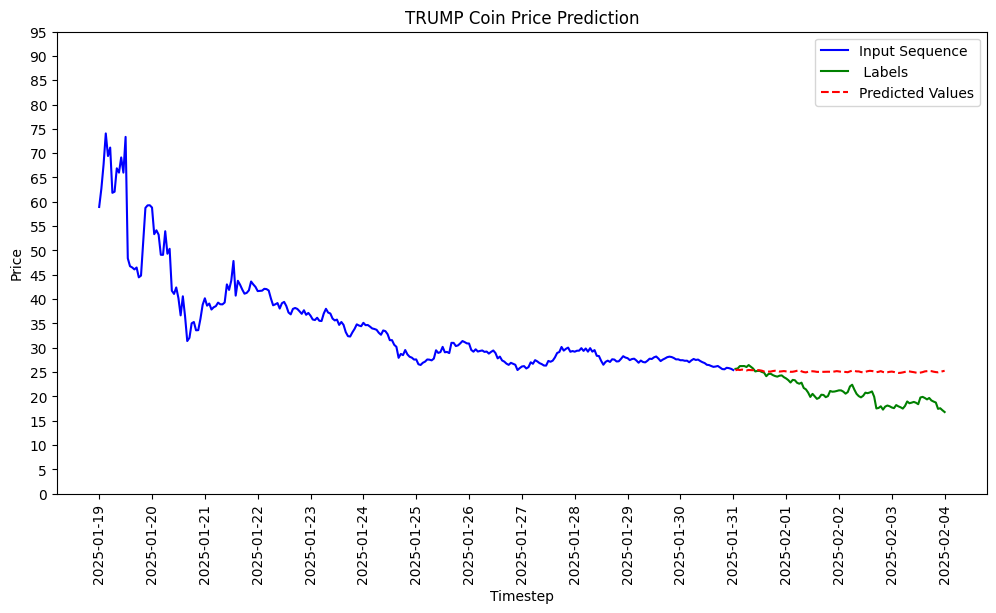

In [11]:
import datetime

# Вычисляем медиану предсказаний
predicted_values_median = np.median(np.array(predictions), axis=0).tolist()

timestamps_input = [datetime.datetime.now() - datetime.timedelta(hours=i) for i in range(n)]
timestamps_input.reverse()

formatted_timestamps = [ts.strftime('%Y-%m-%d') for ts in timestamps_input]


# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(range(n), input_sequence, label="Input Sequence", color="blue")
plt.plot(range(n, n+pred_len), labels, label=" Labels", color="green")
plt.plot(range(n, n+pred_len), predicted_values_median, label="Predicted Values", color="red", linestyle="dashed")
plt.xticks(range(0, len(timestamps_input), 24), formatted_timestamps[::24], rotation=90)
plt.yticks(range(0, 100, 5))
plt.legend()
plt.xlabel("Timestep")
plt.ylabel("Price")
plt.title("TRUMP Coin Price Prediction")
plt.show()

In [ ]:
import ccxt
import openai
import json
import matplotlib.pyplot as plt
from openai import OpenAI
import numpy as np

# Инициализация клиента биржи (используем Binance как пример)
exchange = ccxt.binance()
symbol = "TRUMP/USDT"
timeframe = "1h"

# Получение исторических данных
ohlcv = exchange.fetch_ohlcv(symbol, timeframe)

# Извлечение цен закрытия
closing_prices = [candle[4] for candle in ohlcv]


pred_len = 28*24
# Разделение данных
input_sequence = closing_prices 
# labels = closing_prices[-pred_len:]  # 96 значений для сравнения
n = len(input_sequence)

user_prompt = f"""TRUMP Coin is a memecoin associated with political branding and speculative trading, often experiencing high volatility. 
Given this context, simulate the next {pred_len} (exactly this amount) values based on the trend in **input_sequence** using your best analytical skills. Output **only** a list of numbers, formatted as [value1, value2, ...], with values separated by commas. Provide values that are plausible and within the range of the existing data. Never start your answer with "I'm sorry" or "I can't" etc.\n **input_sequence:**\n{input_sequence}\n\n**labels:** (Hidden)"""

client = OpenAI(
    api_key = OPENAI_API_KEY,
)
predictions = []
for _ in range(10):
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "system",
                "content": "You are a highly skilled time series forecasting assistant with expertise in financial market analysis. Your role is to provide precise and context-aware predictions based solely on the numerical patterns in historical data trends. Assume you are an analyst at Vanguard Total Bond Market, specializing in interpreting financial and operational time series data. Always emulate the behavior of an advanced time series prediction model, considering statistical methods, trend analysis, seasonality, and plausible ranges. When responding, output only a list of predicted numbers in the format `[value1, value2, ...]` with no additional text or explanation."
            },
            {
                "role": "user",
                "content": user_prompt,
            }
        ]
    )
    predicted_values = json.loads(response.choices[0].message.content)
    predictions.append(predicted_values)


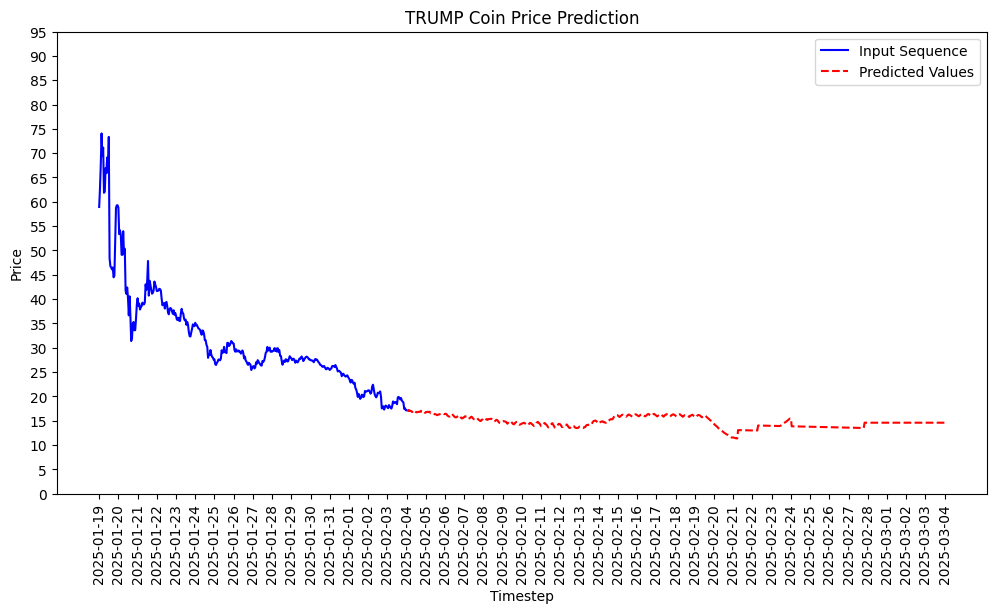

In [5]:
import datetime

for i in range(len(predictions)):
    if len(predictions[i]) < pred_len:
        median = np.median(predictions[i])
        predictions[i].extend([median] * (pred_len - len(predictions[i])))
    elif len(predictions[i]) > pred_len:
        predictions[i] = predictions[i][:pred_len]


predicted_values_median = np.median(np.array(predictions), axis=0).tolist()

timestamps_input = [datetime.datetime.now() - datetime.timedelta(hours=i) for i in range(n)]
timestamps_input.reverse()

timestamps_pred = [timestamps_input[-1] + datetime.timedelta(hours=i+1) for i in range(pred_len)]

timestamps = timestamps_input + timestamps_pred
formatted_timestamps = [ts.strftime('%Y-%m-%d') for ts in timestamps]


# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(range(n), input_sequence, label="Input Sequence", color="blue")

plt.plot(range(n, n+pred_len), predicted_values_median, label="Predicted Values", color="red", linestyle="dashed")
plt.xticks(range(0, len(timestamps), 24), formatted_timestamps[::24], rotation=90)
plt.yticks(range(0, 100, 5))
plt.legend()
plt.xlabel("Timestep")
plt.ylabel("Price")
plt.title("TRUMP Coin Price Prediction")
plt.show()


In [40]:
predicted_values_median[546]

12.31

In [23]:
len(predicted_values)+len(input_sequence)

1010

In [ ]:
import ccxt
import openai
import json
import matplotlib.pyplot as plt
from openai import OpenAI
import numpy as np

# Инициализация клиента биржи (используем Binance как пример)
exchange = ccxt.binance()
symbol = "BTC/USDT"
timeframe = "1d"

# Получение исторических данных
ohlcv = exchange.fetch_ohlcv(symbol, timeframe)

# Извлечение цен закрытия

time_period = 365
pred_len = 56
closing_prices = [candle[4] for candle in ohlcv][-(time_period+pred_len):]
timestamps = [candle[0] for candle in ohlcv][-(time_period+pred_len):]

pred_len = 56
# Разделение данных
input_sequence = closing_prices[:-pred_len]  
labels = closing_prices[-pred_len:]
n = len(input_sequence)

user_prompt = f"""Given BTC cryptocurrency graphic. It is the most popular crypto asset, that is being accumulated by largest Finance Funds. However it is highly volitile asset, and has high volume. 
Given this context, simulate the next {pred_len} (exactly this amount) values based on the trend in **input_sequence** using your best analytical skills. Output **only** a list of numbers, formatted as [value1, value2, ...], with values separated by commas. Provide values that are plausible and within the range of the existing data. Never start your answer with "I'm sorry" or "I can't" etc.\n **input_sequence:**\n{input_sequence}\n"""


client = OpenAI(
    api_key = OPENAI_API_KEY,
)
predictions = []
for _ in range(10):
    response = client.chat.completions.create(
        model="gpt-4o",
        temperature=0.9,
        messages=[
            {
                "role": "system",
                "content": "You are a highly skilled time series forecasting assistant with expertise in financial market analysis. Your role is to provide precise and context-aware predictions of cryptocurrency charts based solely on the numerical patterns in historical data trends. Assume you are an analyst at Vanguard Total Bond Market, specializing in interpreting financial and operational time series data. Always emulate the behavior of an advanced time series prediction model, considering statistical methods, trend analysis, seasonality, and plausible ranges. When responding, output only a list of predicted numbers in the format `[value1, value2, ...]` with no additional text or explanation."
            },
            {
                "role": "user",
                "content": user_prompt,
            }
        ]
    )
    predicted_values = json.loads(response.choices[0].message.content)
    predictions.append(predicted_values)


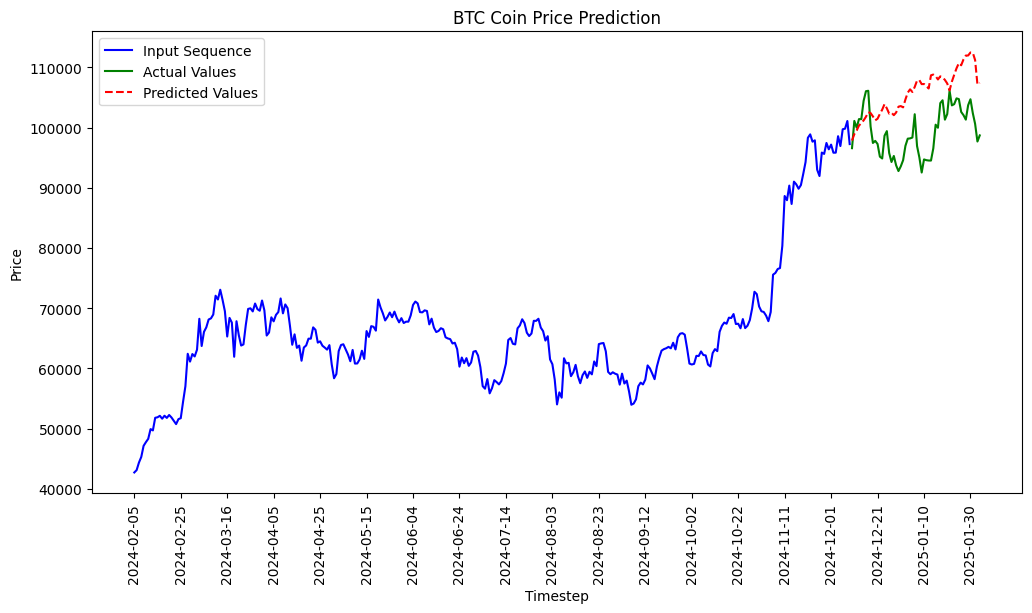

In [56]:
import datetime


# Преобразование меток времени в формат дней
dates = [datetime.datetime.fromtimestamp(ts / 1000).strftime('%Y-%m-%d') for ts in timestamps]

for i in range(len(predictions)):
    if len(predictions[i]) < pred_len:
        median = np.median(predictions[i])
        predictions[i].extend([median] * (pred_len - len(predictions[i])))
    elif len(predictions[i]) > pred_len:
        predictions[i] = predictions[i][:pred_len]


# Вычисляем медиану предсказаний
predicted_values_median = np.median(np.array(predictions), axis=0).tolist()

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(dates[:-pred_len], input_sequence, label="Input Sequence", color="blue")
plt.xticks(range(0, len(dates), 20), [dates[i] for i in range(0, len(dates), 20)], rotation=90)
# plt.plot(range(n), input_sequence, label="Input Sequence", color="blue")


plt.plot(dates[-pred_len:], labels, label="Actual Values", color="green")
plt.plot(dates[-pred_len:], predicted_values_median, label="Predicted Values", color="red", linestyle="dashed")
# plt.plot(range(n, n+pred_len), labels, label="Actual Values", color="green")
# plt.plot(range(n, n+pred_len), predicted_values_median, label="Predicted Values", color="red", linestyle="dashed")

plt.legend()
plt.xlabel("Timestep")
plt.ylabel("Price")
plt.title("BTC Coin Price Prediction")
plt.show()


In [27]:
time_period = 365
closing_prices = [candle[4] for candle in ohlcv][-time_period:]
timestamps = [candle[0] for candle in ohlcv][-time_period:]
timestamps_pred = range(timestamps[-1], timestamps[-1]+pred_len*24*3600*1000+1,24*3600*1000)

In [ ]:
import ccxt
import openai
import json
import matplotlib.pyplot as plt
from openai import OpenAI
import numpy as np

# Инициализация клиента биржи (используем Binance как пример)
exchange = ccxt.binance()
symbol = "BTC/USDT"
timeframe = "1d"

# Получение исторических данных
ohlcv = exchange.fetch_ohlcv(symbol, timeframe)

time_period = 365
closing_prices = [candle[4] for candle in ohlcv][-time_period:]
timestamps = [candle[0] for candle in ohlcv][-time_period:]


pred_len = 56
# Разделение данных
input_sequence = closing_prices
# labels = closing_prices[-pred_len:]
n = len(input_sequence)

user_prompt = f"""Given BTC cryptocurrency graphic. It is the most popular crypto asset, that is being accumulated by largest Finance Funds. However it is highly volitile asset, and has high volume. 
Given this context, simulate the next {pred_len} (exactly this amount) values based on the trend in **input_sequence** using your best analytical skills. Output **only** a list of numbers, formatted as [value1, value2, ...], with values separated by commas. Provide values that are plausible and within the range of the existing data. Never start your answer with "I'm sorry" or "I can't" etc.\n **input_sequence:**\n{input_sequence}\n"""

# Отправка запроса в GPT-4o

client = OpenAI(
    api_key = OPENAI_API_KEY,
)
predictions = []
for _ in range(10):
    response = client.chat.completions.create(
        model="gpt-4o",
        temperature=0.9,
        messages=[
            {
                "role": "system",
                "content": "You are a highly skilled time series forecasting assistant with expertise in financial market analysis. Your role is to provide precise and context-aware predictions of cryptocurrency charts based solely on the numerical patterns in historical data trends. Assume you are an analyst at Vanguard Total Bond Market, specializing in interpreting financial and operational time series data. Always emulate the behavior of an advanced time series prediction model, considering statistical methods, trend analysis, seasonality, and plausible ranges. When responding, output only a list of predicted numbers in the format `[value1, value2, ...]` with no additional text or explanation."
            },
            {
                "role": "user",
                "content": user_prompt,
            }
        ]
    )
    predicted_values = json.loads(response.choices[0].message.content)
    predictions.append(predicted_values)



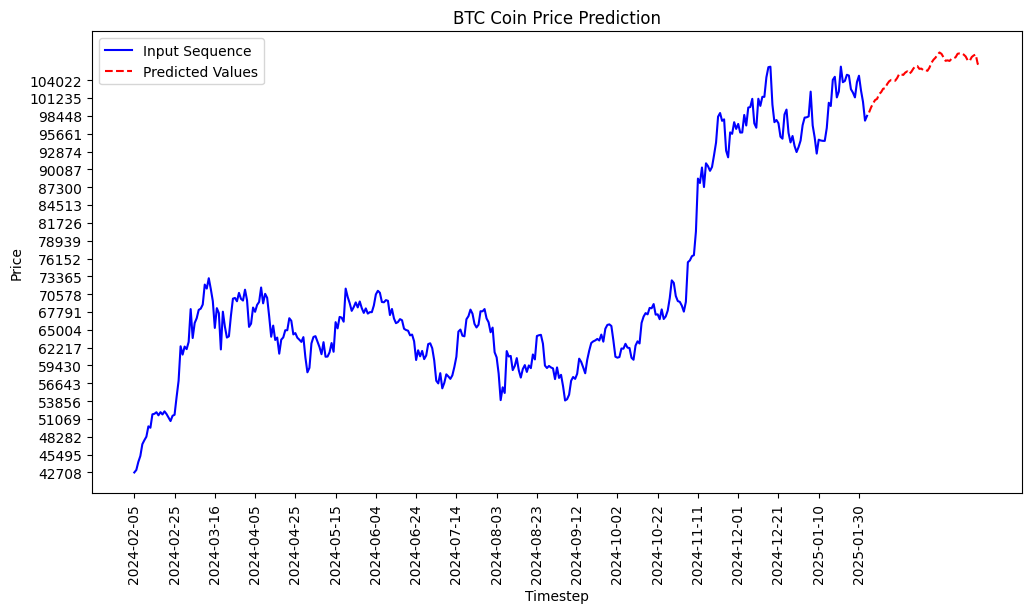

In [58]:

import datetime

step = 24*3600*1000
timestamps_pred = range(timestamps[-1]+step, timestamps[-1]+pred_len*step+1, step)

dates = [datetime.datetime.fromtimestamp(ts / 1000).strftime('%Y-%m-%d') for ts in timestamps]
pred_dates = [datetime.datetime.fromtimestamp(ts / 1000).strftime('%Y-%m-%d') for ts in timestamps_pred]

for i in range(len(predictions)):
    if len(predictions[i]) < pred_len:
        median = np.median(predictions[i])
        predictions[i].extend([median] * (pred_len - len(predictions[i])))
    elif len(predictions[i]) > pred_len:
        predictions[i] = predictions[i][:pred_len]


# Вычисляем медиану предсказаний
predicted_values_median = np.median(np.array(predictions), axis=0).tolist()

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(dates, input_sequence, label="Input Sequence", color="blue")
plt.xticks(range(0, len(dates), 20), [dates[i] for i in range(0, len(dates), 20)], rotation=90)
plt.plot(pred_dates, predicted_values_median, label="Predicted Values", color="red", linestyle="dashed")
plt.xticks(range(0, len(dates), 20), [dates[i] for i in range(0, len(dates), 20)], rotation=90)
y_range = range(int(np.min(input_sequence)), int(np.max(input_sequence)), int(input_sequence[-1]-input_sequence[0])//20)
plt.yticks(y_range, [i for i in y_range])
# plt.plot(range(n, n+pred_len), labels, label="Actual Values", color="green")
# plt.plot(range(n, n+pred_len), predicted_values_median, label="Predicted Values", color="red", linestyle="dashed")

plt.legend()
plt.xlabel("Timestep")
plt.ylabel("Price")
plt.title("BTC Coin Price Prediction")
plt.show()

In [ ]:
import ccxt
import openai
import json
import matplotlib.pyplot as plt
from openai import OpenAI
import numpy as np

# Инициализация клиента биржи (используем Binance как пример)
exchange = ccxt.binance()
symbol = "BTC/USDT"
timeframe = "1d"

# Получение исторических данных
ohlcv = exchange.fetch_ohlcv(symbol, timeframe)

# Извлечение цен закрытия

time_period = 365
pred_len = 56
closing_prices = [candle[4] for candle in ohlcv][-(time_period+pred_len):]
timestamps = [candle[0] for candle in ohlcv][-(time_period+pred_len):]

pred_len = 56
# Разделение данных
input_sequence = closing_prices[:-pred_len]  
labels = closing_prices[-pred_len:]
n = len(input_sequence)

user_prompt = f"""Given BTC cryptocurrency graphic. It is the most popular crypto asset, that is being accumulated by largest Finance Funds. However it is highly volitile asset, and has high volume. 
Given this context, simulate the next {pred_len} (exactly this amount) values based on the trend in **input_sequence** using your best analytical skills. Output **only** a list of numbers, formatted as [value1, value2, ...], with values separated by commas. Never start your answer with "I'm sorry" or "I can't" etc.\n **input_sequence:**\n{input_sequence}\n"""

# Отправка запроса в GPT-4o

client = OpenAI(
    api_key = OPENAI_API_KEY,
)
predictions = []

for _ in range(10):
    response = client.chat.completions.create(
        model="o3-mini-2025-01-31",
        messages=[
            {
                "role": "system",
                "content": "You are a highly skilled time series forecasting assistant with expertise in financial market analysis. Your role is to provide precise and context-aware predictions of cryptocurrency charts based solely on the numerical patterns in historical data trends. Assume you are an analyst at Vanguard Total Bond Market, specializing in interpreting financial and operational time series data. Always emulate the behavior of an advanced time series prediction model, considering statistical methods, trend analysis, seasonality, and plausible ranges. When responding, output only a list of predicted numbers in the format `[value1, value2, ...]` with no additional text or explanation."
            },
            {
                "role": "user",
                "content": user_prompt,
            }
        ]
    )
    predicted_values = json.loads(response.choices[0].message.content)
    predictions.append(predicted_values)


In [4]:
response

ChatCompletion(id='chatcmpl-AxvtorMZxYg7BeyeBCndD3LZivXG9', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='[100304.29, 99704.29, 100604.29, 100204.29, 100904.29, 101104.29, 100304.29, 100204.29, 100804.29, 101204.29, 100504.29, 101504.29, 100404.29, 100754.29, 101204.29, 100704.29, 101304.29, 100754.29, 101054.29, 101304.29, 100504.29, 101454.29, 100754.29, 101104.29, 100304.29, 100904.29, 100404.29, 100904.29, 101104.29, 100804.29, 100404.29, 101404.29, 100704.29, 101054.29, 100604.29, 101104.29, 100504.29, 100904.29, 100554.29, 101254.29, 100354.29, 100854.29, 100454.29, 100904.29, 100604.29, 101204.29, 100554.29, 101254.29, 100754.29, 101304.29, 100704.29, 101404.29, 100754.29, 101204.29, 100704.29, 101304.29]', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1738847280, model='o3-mini-2025-01-31', object='chat.completion', service_tier='default', system_fingerprint='fp_8bcaa0ca21', usa

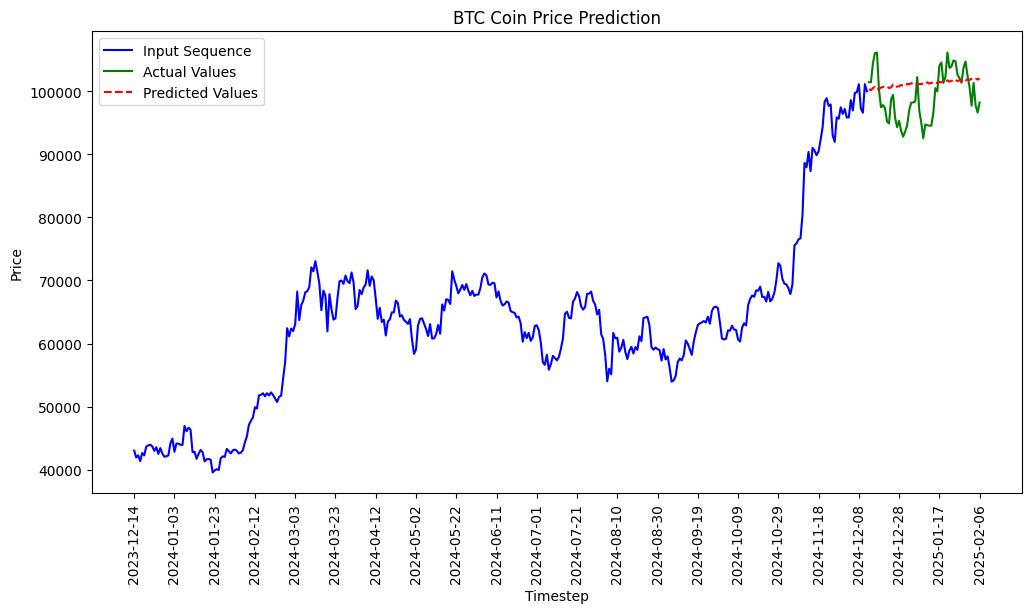

In [8]:
import datetime


# Преобразование меток времени в формат дней
dates = [datetime.datetime.fromtimestamp(ts / 1000).strftime('%Y-%m-%d') for ts in timestamps]

for i in range(len(predictions)):
    if len(predictions[i]) < pred_len:
        median = np.median(predictions[i])
        predictions[i].extend([median] * (pred_len - len(predictions[i])))
    elif len(predictions[i]) > pred_len:
        predictions[i] = predictions[i][:pred_len]

predicted_values_median = np.median(np.array(predictions), axis=0).tolist()

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(dates[:-pred_len], input_sequence, label="Input Sequence", color="blue")
plt.xticks(range(0, len(dates), 20), [dates[i] for i in range(0, len(dates), 20)], rotation=90)
plt.plot(dates[-pred_len:], labels, label="Actual Values", color="green")
plt.plot(dates[-pred_len:], predicted_values_median, label="Predicted Values", color="red", linestyle="dashed")

plt.legend()
plt.xlabel("Timestep")
plt.ylabel("Price")
plt.title("BTC Coin Price Prediction")
plt.show()


1440

In [3]:
%pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 7.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 7.2 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.17.9-cp311-cp311-linux_x86_64.whl size=300926 sha256=e7b66c4410295f00ac9c6a42c607c3645b30661558372a5d23c8e61cd88a0087
  Stored in directory: /home/arsenii.pimenov@corp.raftds.com/.cache/pip/wheels/f4/14/e4/50c88c865833085aeb91e2bd40e3a683ff434806386b8ee7bc
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [26]:
import ccxt
import datetime

# Инициализация клиента биржи (Binance)
exchange = ccxt.binance()
symbol = "BTC/USDT"
timeframe = "1d"

# Определяем период для 60 дней: с 1 июня 2024
start_july_aug = datetime.datetime(2024, 7, 1)
limit_july_aug = 62  # 60 дней данных

# Определяем период для сентября 2024: с 1 сентября 2024
start_sept = datetime.datetime(2024, 9, 1)
limit_sept = 30  # 30 дней данных (сентябрь)

# Переводим начальные даты в timestamp в миллисекундах
since_july_aug = int(start_july_aug.timestamp() * 1000)
since_sept = int(start_sept.timestamp() * 1000)

# Получаем исторические данные для периода с 1 июня 2024 (60 дней)
ohlcv_july_aug = exchange.fetch_ohlcv(symbol, timeframe, since=since_july_aug, limit=limit_july_aug)
closing_prices_july_aug = [candle[4] for candle in ohlcv_july_aug]
timestamps_july_aug = [candle[0] for candle in ohlcv_july_aug]

# Получаем исторические данные для сентября 2024 (30 дней)
ohlcv_sept = exchange.fetch_ohlcv(symbol, timeframe, since=since_sept, limit=limit_sept)
closing_prices_sept = [candle[4] for candle in ohlcv_sept]
timestamps_sept = [candle[0] for candle in ohlcv_sept]
print([datetime.datetime.fromtimestamp(candle[0] / 1000) for candle in ohlcv_sept])
# Вывод полученных данных для проверки
print("July-August 2024 (60 дней):")
for ts, price in zip(timestamps_july_aug, closing_prices_july_aug):
    date_str = datetime.datetime.fromtimestamp(ts / 1000).strftime('%Y-%m-%d')
    print(f"{date_str}: {price}")

print("\nSeptember 2024 (30 дней):")
for ts, price in zip(timestamps_sept, closing_prices_sept):
    print(ts)
    date_str = datetime.datetime.fromtimestamp(ts / 1000).strftime('%Y-%m-%d')
    print(f"{date_str}: {price}")


[datetime.datetime(2024, 9, 1, 3, 0), datetime.datetime(2024, 9, 2, 3, 0), datetime.datetime(2024, 9, 3, 3, 0), datetime.datetime(2024, 9, 4, 3, 0), datetime.datetime(2024, 9, 5, 3, 0), datetime.datetime(2024, 9, 6, 3, 0), datetime.datetime(2024, 9, 7, 3, 0), datetime.datetime(2024, 9, 8, 3, 0), datetime.datetime(2024, 9, 9, 3, 0), datetime.datetime(2024, 9, 10, 3, 0), datetime.datetime(2024, 9, 11, 3, 0), datetime.datetime(2024, 9, 12, 3, 0), datetime.datetime(2024, 9, 13, 3, 0), datetime.datetime(2024, 9, 14, 3, 0), datetime.datetime(2024, 9, 15, 3, 0), datetime.datetime(2024, 9, 16, 3, 0), datetime.datetime(2024, 9, 17, 3, 0), datetime.datetime(2024, 9, 18, 3, 0), datetime.datetime(2024, 9, 19, 3, 0), datetime.datetime(2024, 9, 20, 3, 0), datetime.datetime(2024, 9, 21, 3, 0), datetime.datetime(2024, 9, 22, 3, 0), datetime.datetime(2024, 9, 23, 3, 0), datetime.datetime(2024, 9, 24, 3, 0), datetime.datetime(2024, 9, 25, 3, 0), datetime.datetime(2024, 9, 26, 3, 0), datetime.datetime(20

[*********************100%***********************]  1 of 1 completed

Fetching Natural Gas data from 2009-05-08 to 2025-02-13 (1mo interval).
Fetched 162 months of data.
Using 9 years of history and predicting 4 years ahead.


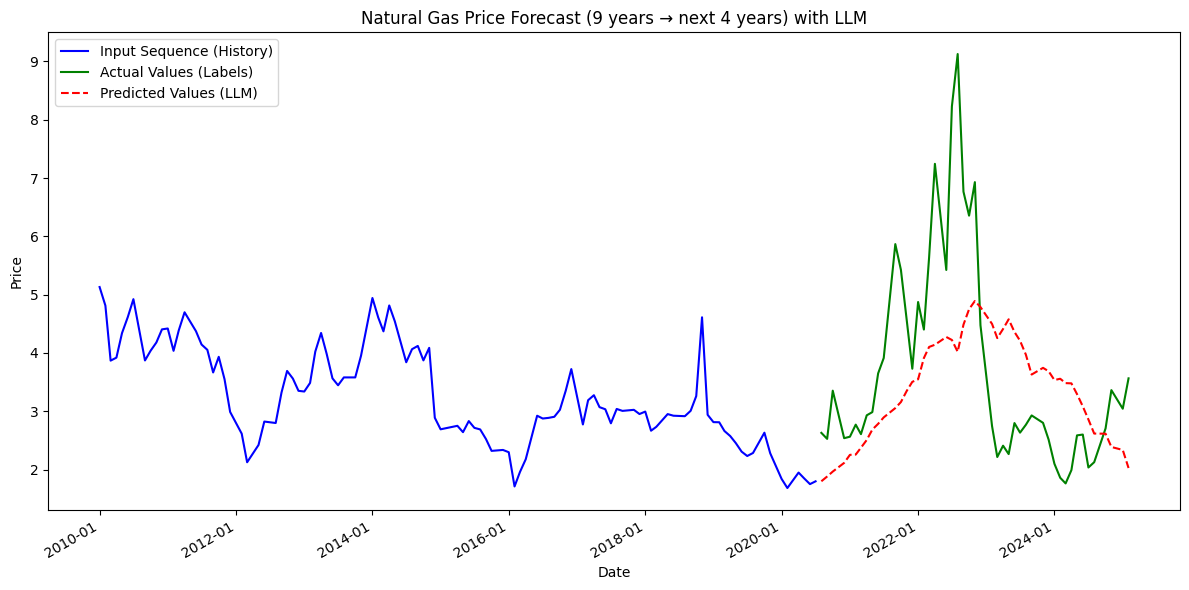

In [ ]:
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
import openai
import json

# -------------------------------
# Set Parameters
# -------------------------------
symbol = "NG=F"  # Natural Gas Futures Yahoo Finance ticker
timeframe = "1mo"  # Monthly data
history_years = 12
pred_years = 4
model_name = "o3-mini-2025-01-31"  # OpenAI Model for forecasting

# Calculate required historical period
today = datetime.datetime.today()
required_months = (history_years * 12) + (pred_years * 12)  # History + Prediction
start_date = (today - datetime.timedelta(days=required_months * 30)).strftime('%Y-%m-%d')
end_date = today.strftime('%Y-%m-%d')

# -------------------------------
# Fetch Data
# -------------------------------
print(f"Fetching Natural Gas data from {start_date} to {end_date} ({timeframe} interval).")

df = yf.download(symbol, start=start_date, end=end_date, interval=timeframe)

if df.empty:
    raise ValueError("No data returned from Yahoo Finance. Check the ticker symbol and date range.")

# Extract Closing Prices and Timestamps
closing_prices = df["Close"].dropna().values.tolist()  # Remove NaN values
all_timestamps = df.index.to_pydatetime().tolist()  # Convert index to datetime list

print(f"Fetched {len(closing_prices)} months of data.")

# -------------------------------
# Ensure Data is Sufficient for Forecasting
# -------------------------------
total_months_available = len(closing_prices)

if total_months_available < pred_years * 12:
    print(f"⚠️ Warning: Not enough data to make a full {pred_years}-year prediction.")
    pred_years = max(1, total_months_available // 12)  # Reduce prediction length to available data

# Adjust history period dynamically if not enough data
history_years = max(1, (total_months_available - pred_years * 12) // 12)  # Ensure at least 1 year of history
time_period = history_years * 12  # Adjusted historical data period
pred_len = pred_years * 12  # Adjusted prediction length

print(f"Using {history_years} years of history and predicting {pred_years} years ahead.")

# -------------------------------
# Data Slicing for Training & Prediction
# -------------------------------
input_sequence = closing_prices[-(time_period + pred_len):-pred_len] if len(closing_prices) > pred_len else closing_prices[:-pred_len]
labels = closing_prices[-pred_len:] if len(closing_prices) > pred_len else []
dt_hist = all_timestamps[-(time_period + pred_len):-pred_len] if len(all_timestamps) > pred_len else all_timestamps[:-pred_len]
dt_labels = all_timestamps[-pred_len:] if len(all_timestamps) > pred_len else []

# Ensure input_sequence is a **flat list of numerical values**
if isinstance(input_sequence[0], list):  
    input_sequence = [item for sublist in input_sequence for item in sublist]  # Flatten if needed

# -------------------------------
# LLM-Based Forecasting with OpenAI
# -------------------------------

client = openai.OpenAI(api_key=OPENAI_API_KEY)

user_prompt = f"""
Given the historical price movement of Natural Gas (NATGAS/USD), this asset follows **strong seasonal cycles** and is heavily influenced by supply-demand factors, weather conditions, and energy policies.

### **Key Considerations for Natural Gas Trends:**
1. **Winter Demand:** Prices typically spike in winter (October–March) due to heating needs.
2. **Summer Demand:** Power plant usage increases for cooling, affecting demand but to a lesser extent.
3. **Storage Reports:** Weekly US Energy Information Administration (EIA) storage reports create strong fluctuations.
4. **Weather Forecasts:** Extreme cold or heat can cause sudden price spikes due to unexpected demand.
5. **Production & Exports:** LNG (Liquefied Natural Gas) exports, geopolitical conflicts, and supply chain disruptions also impact prices.

### **Output Requirements:**
Simulate the next {pred_len} values while accounting for **seasonal cycles, volatility, and macroeconomic sentiment**.
Output **only** a list of numbers formatted as `[value1, value2, ...]`, separated by commas.

**input_sequence:**
{input_sequence}
"""

client = openai.OpenAI(api_key=OPENAI_API_KEY)

predictions = []
for _ in range(10):
    response = client.chat.completions.create(
        model="o3-mini-2025-01-31",
        messages=[
            {
                "role": "system",
                "content": ("You are a highly skilled time series forecasting assistant with expertise in financial market analysis. Your role is to provide precise and context-aware predictions based solely on the numerical patterns in historical data trends. Assume you are an analyst at Vanguard Total Bond Market, specializing in interpreting financial and operational time series data. Always emulate the behavior of an advanced time series prediction model, considering statistical methods, trend analysis, seasonality, and plausible ranges. When responding, output only a list of predicted numbers in the format `[value1, value2, ...]` with no additional text or explanation.")
            },
            {"role": "user", "content": user_prompt}
        ]
    )
    predicted_values = json.loads(response.choices[0].message.content)
    predictions.append(predicted_values)

# Adjust prediction lengths if necessary
for i in range(len(predictions)):
    if len(predictions[i]) < pred_len:
        median = np.median(predictions[i])
        predictions[i].extend([median] * (pred_len - len(predictions[i])))
    elif len(predictions[i]) > pred_len:
        predictions[i] = predictions[i][:pred_len]

# Take the median of all predictions
predicted_values_median = np.median(np.array(predictions), axis=0).tolist()

# Generate future timestamps for predictions
# Ensure predicted values align with the same timeline as actual labels
dt_pred = dt_labels  # Use the exact same timestamps as the actual labels

# -------------------------------
# Plot Results
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(dt_hist, input_sequence, label="Input Sequence (History)", color="blue")
plt.plot(dt_labels, labels, label="Actual Values (Labels)", color="green")

if predicted_values_median:
    plt.plot(dt_pred, predicted_values_median, label="Predicted Values (LLM)", color="red", linestyle="dashed")

# Formatting for date axis
from matplotlib.dates import DateFormatter, AutoDateLocator
locator = AutoDateLocator()
formatter = DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()

plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Natural Gas Price Forecast ({history_years} years → next {pred_years} years) with LLM")
plt.tight_layout()
plt.savefig("natgas_median.png")
plt.show()



In [1]:
import requests
try:
    response = requests.get("https://api.deepseek.com", timeout=5)
    print("API доступен.")
except requests.exceptions.RequestException as e:
    print(f"Ошибка подключения к API: {e}")

API доступен.
